In [65]:
%reload_ext autoreload
%autoreload 2

In [2]:
import jupytools.syspath
jupytools.syspath.add('..')

In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataset import load, n_unique, missing_info, existing_info, Subset
from style import make_colors, create_axes_if_needed, tableau, NotebookStyle

In [4]:
trn_data, trn_target, trn_specs = load(Subset.Train)

(11341042, 11) (17690, 7) (386, 3) 

In [5]:
n_unique(trn_data)

event_id: 384
game_session: 303319
timestamp: 10777308
event_data: 10893749
installation_id: 17000
event_count: 3368
event_code: 42
game_time: 834048
title: 44
type: 4
world: 4


In [6]:
n_unique(trn_target)

game_session: 17690
installation_id: 3614
title: 5
num_correct: 2
num_incorrect: 46
accuracy: 30
accuracy_group: 4


In [7]:
n_unique(trn_specs)

event_id: 386
info: 168
args: 191


In [8]:
[tst_data] = load(Subset.Test)

(1156414, 11) 

In [9]:
n_unique(tst_data)

event_id: 365
game_session: 28445
timestamp: 1103166
event_data: 1120854
installation_id: 1000
event_count: 4456
event_code: 42
game_time: 309119
title: 44
type: 4
world: 4


In [10]:
missing_info(trn_data)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,object,int64,int64,int64,object,object,object


In [11]:
missing_info(tst_data)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,object,int64,int64,int64,object,object,object


In [12]:
missing_info(trn_target)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
Total,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0
Types,object,object,object,int64,int64,float64,int64


In [13]:
missing_info(trn_specs)

,event_id,info,args
Total,0,0,0
Percent,0,0,0
Types,object,object,object


In [14]:
style = NotebookStyle()
style.override()

In [15]:
def plot_bars_with_percentage(dataframe, xcol, ycol, 
                              xlabel='', 
                              ylabel='',
                              orient='horizontal',
                              colors=None,
                              ax=None, **fig_kwargs):
    
    assert orient in ('horizontal', 'vertical'), f'invalid orient value: {orient}'
    f, ax = create_axes_if_needed(ax=ax, **fig_kwargs)
    colors = colors if colors is not None else make_colors(tableau, len(dataframe))

    def generate_bars(df, ax=None):
        ax = dataframe.plot.barh(x=xcol, y=ycol, ax=ax, color=colors)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_axisbelow(True)
        ax.grid(True)
        ax.get_legend().remove()
        return ax
    
    def generate_percentage_annotations(df, ax):
        total = df[ycol].sum()
        max_val = df[ycol].max()
        for i, count in enumerate(df[ycol]):
            ax.text(
                count+(0.01*max_val), i, f'{count/total:2.2%}', fontsize=12, 
                verticalalignment='center', 
                horizontalalignment='left',
                bbox=dict(facecolor='white', edgecolor='black'))
        return ax
    
    def adjust_limits(ax):
        x_min, x_max = ax.get_xlim()
        x_max *= 1.1
        ax.set_xlim(x_min, x_max)
        return ax
    
    ax = generate_bars(dataframe, ax=ax)
    ax = generate_percentage_annotations(dataframe, ax=ax)
    ax = adjust_limits(ax)
    return ax

In [16]:
def plot_counts(dataset, column, most_freq=20, ax=None, rotation=0, **fig_kwargs):
    f, ax = create_axes_if_needed(ax, **fig_kwargs)
    cnt = dataset[column].value_counts()
    order = cnt.index
    if most_freq is not None:
        order = order[:most_freq]
    sns.countplot(dataset[column], order=order, ax=ax)
    total = len(dataset)
    max_height = max(cnt)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 0.02*max_height,
               f'{height/total:1.2%}', ha='center')
    ax.set_xticklabels(order, rotation=rotation)
    ax.set_title(f'Count plot for feature: "{column.title()}"', y=1.05)

In [17]:
def count(dataframe, column, most_freq=20, ascending=True):
    cnt = dataframe[column].value_counts()
    if most_freq is not None:
        cnt = cnt.head(most_freq)
    cnt = cnt.rename('count').reset_index()
    cnt = cnt.rename(columns={'index': column})
    cnt = cnt.sort_values(by='count', ascending=ascending)
    return cnt

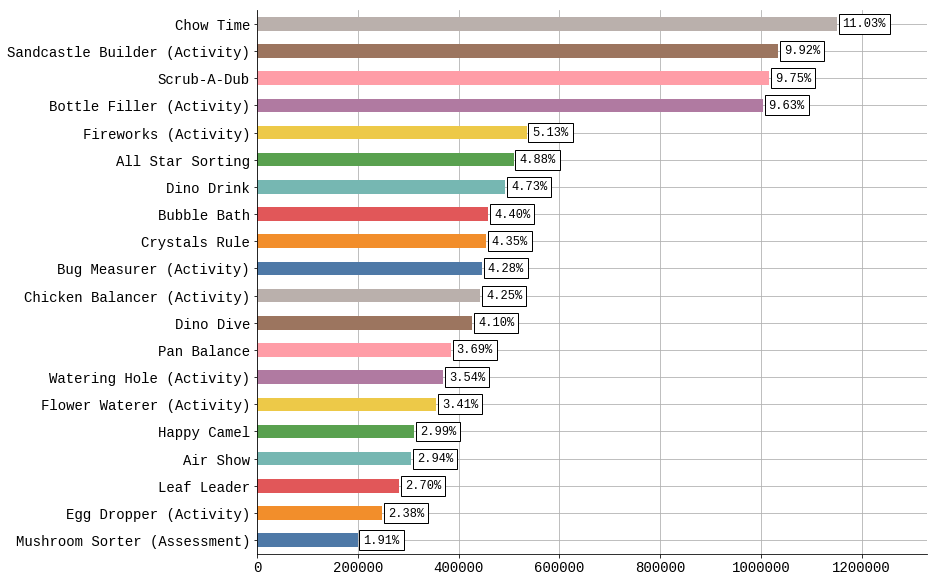

In [18]:
plot_bars_with_percentage(count(trn_data, 'title'), xcol='title', ycol='count', figsize=(12, 10));

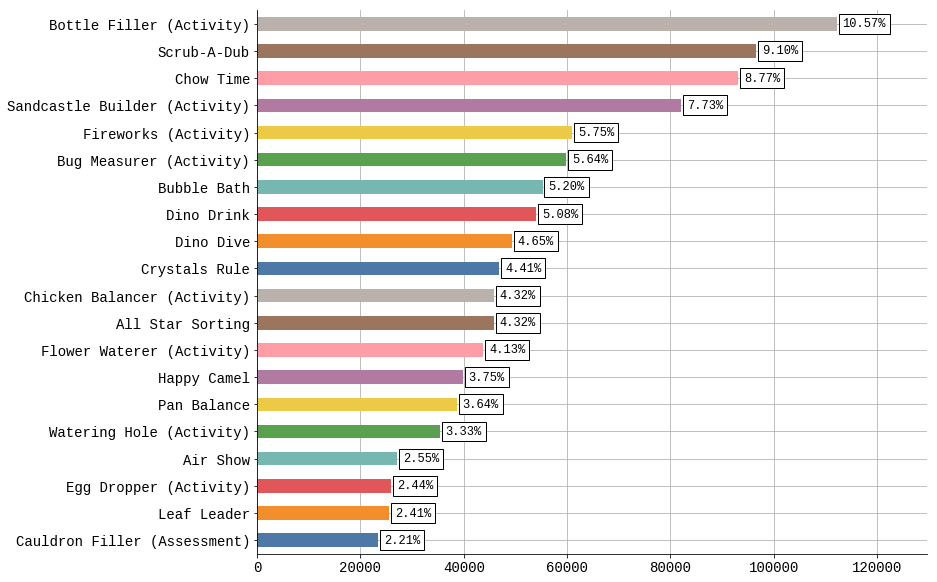

In [19]:
plot_bars_with_percentage(count(tst_data, 'title'), xcol='title', ycol='count', figsize=(12, 10));

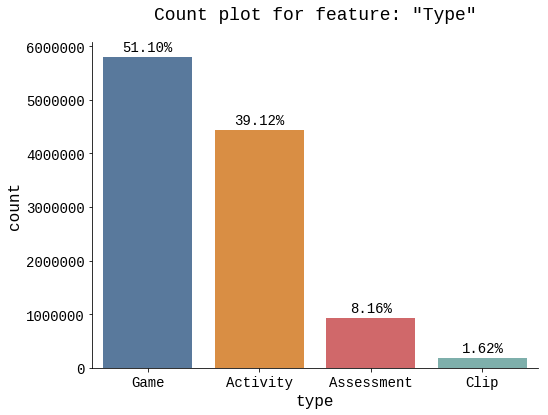

In [20]:
plot_counts(trn_data, 'type')

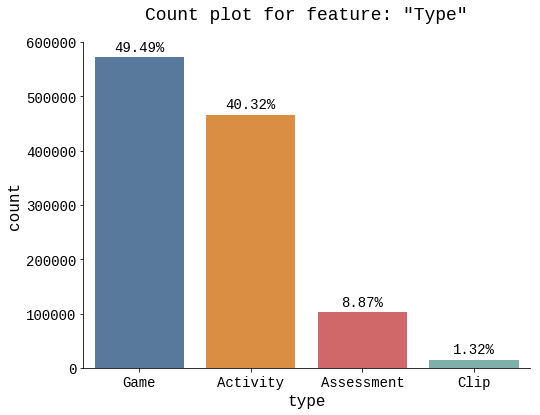

In [21]:
plot_counts(tst_data, 'type')

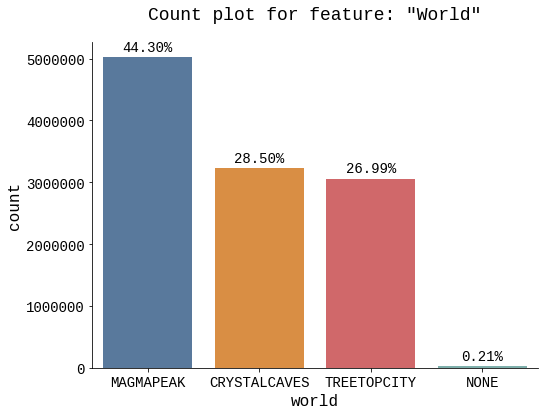

In [22]:
plot_counts(trn_data, 'world')

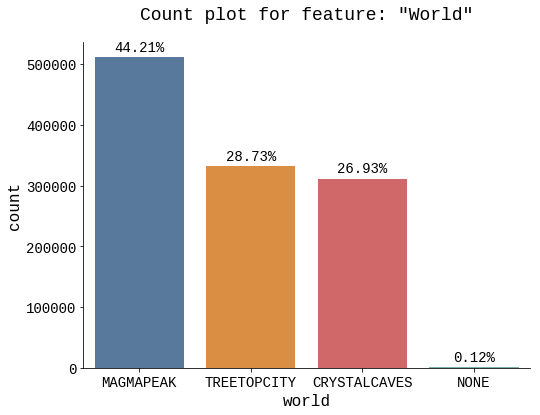

In [23]:
plot_counts(tst_data, 'world')

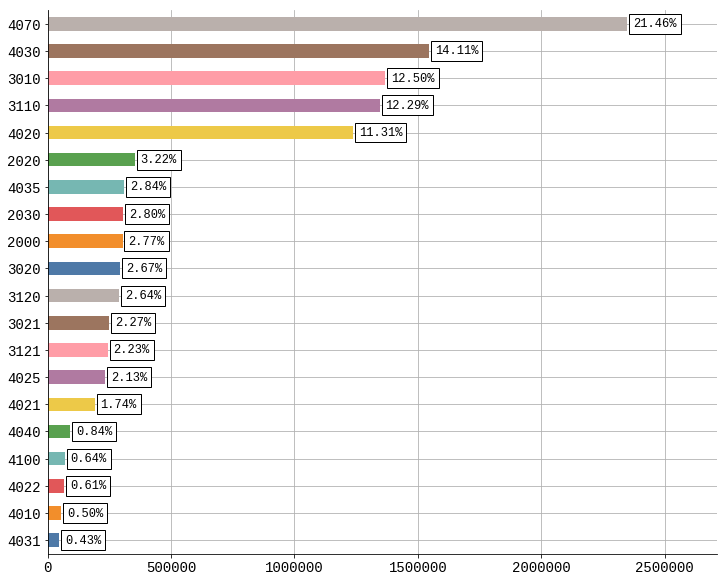

In [24]:
plot_bars_with_percentage(count(trn_data, 'event_code'), 
                          xcol='event_code', ycol='count', figsize=(12, 10));

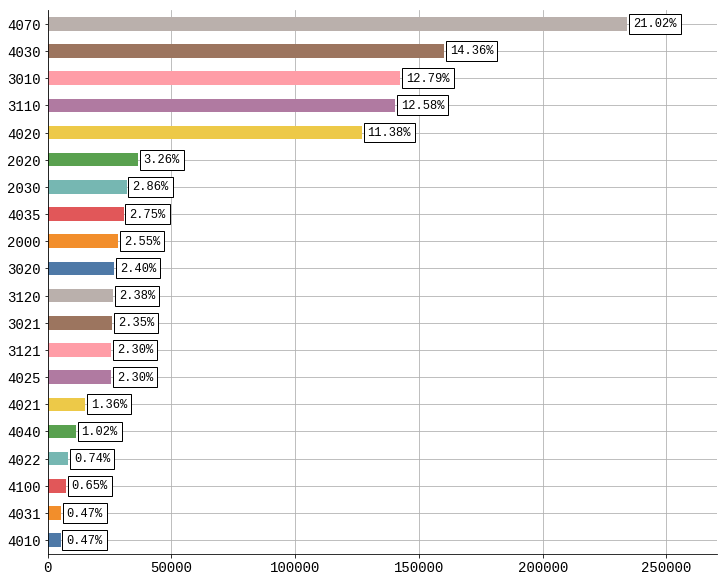

In [25]:
plot_bars_with_percentage(count(tst_data, 'event_code'), 
                          xcol='event_code', ycol='count', figsize=(12, 10));

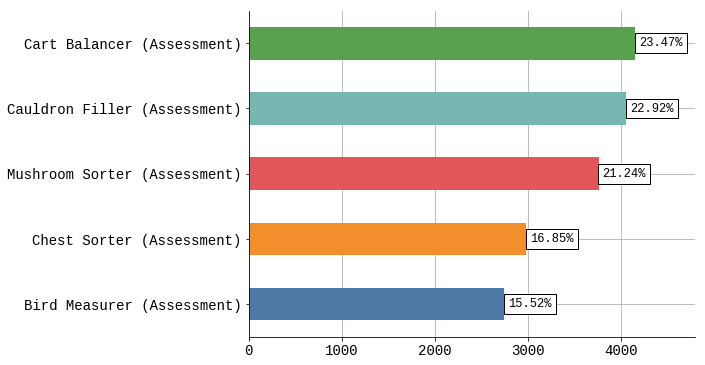

In [26]:
plot_bars_with_percentage(count(trn_target, 'title'), 
                          xcol='title', ycol='count', figsize=(8, 6));

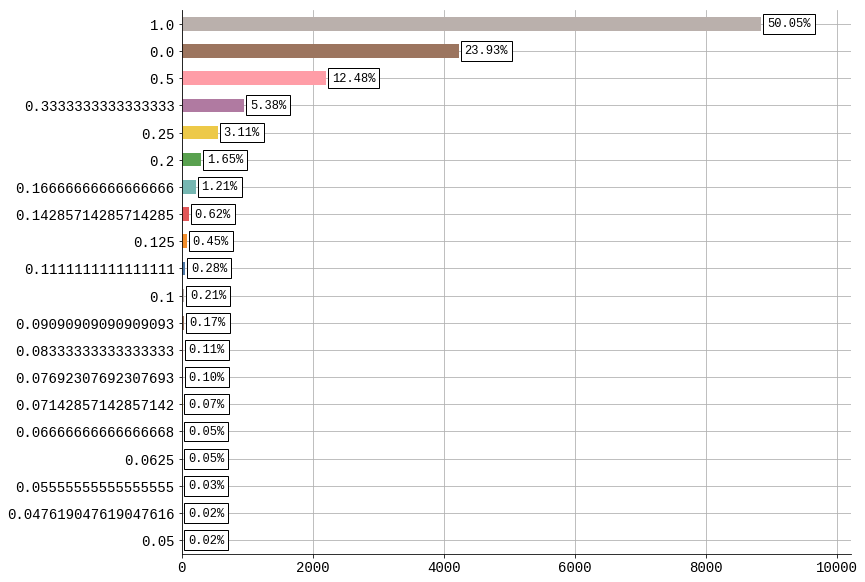

In [27]:
plot_bars_with_percentage(count(trn_target, 'accuracy'), 
                          xcol='accuracy', ycol='count', figsize=(12, 10));

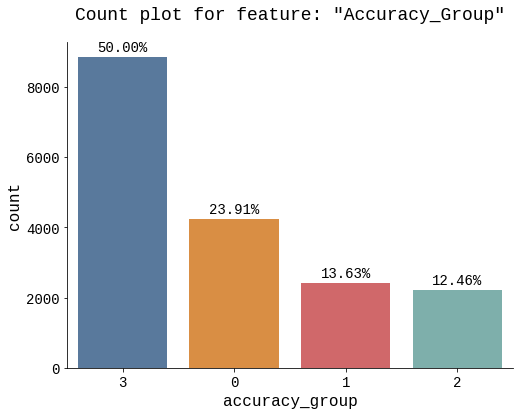

In [28]:
plot_counts(trn_target, 'accuracy_group')

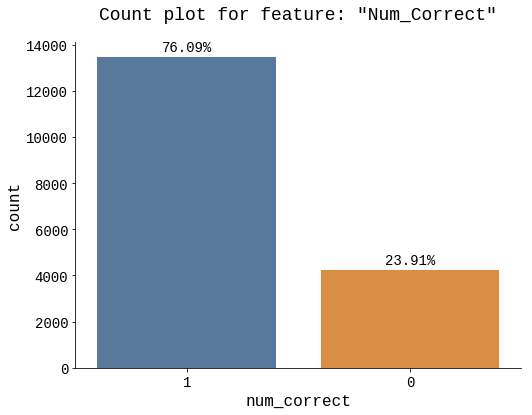

In [29]:
plot_counts(trn_target, 'num_correct')

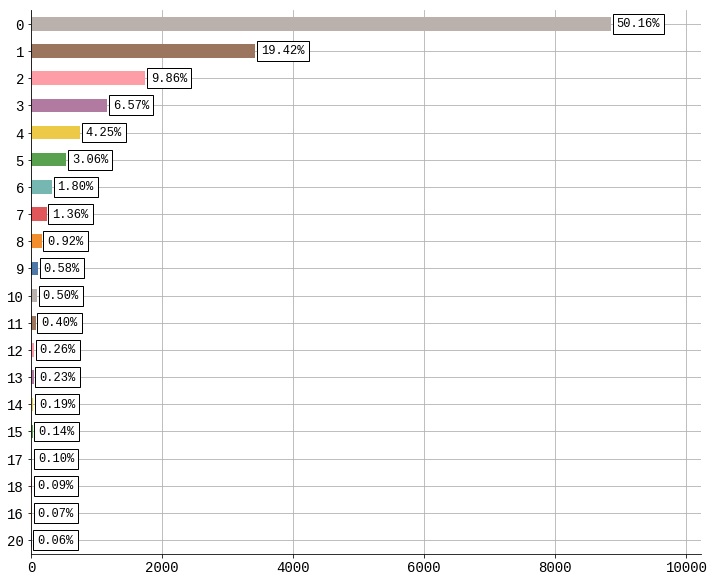

In [30]:
plot_bars_with_percentage(count(trn_target, 'num_incorrect'), 
                          xcol='num_incorrect', ycol='count', figsize=(12, 10));

In [66]:
sample = trn_data.sample(500000)

In [32]:
sample.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
602959,b88f38da,1d6c57b056cb5673,2019-09-16T21:36:23.505Z,"{""description"":""That one was so low!"",""identif...",0d5a1a5e,42,3110,46054,Fireworks (Activity),Activity,TREETOPCITY
10764571,90efca10,bcfab582f66c67a0,2019-08-22T21:11:54.844Z,"{""bottle"":{""amount"":2,""color"":""pink""},""bottles...",f2df7050,247,4020,456201,Bottle Filler (Activity),Activity,MAGMAPEAK
5189589,15f99afc,123850b3760dc0f2,2019-08-21T22:00:06.861Z,"{""description"":""Now lets try another rock."",""i...",73a5310e,24,3110,32081,Pan Balance,Game,CRYSTALCAVES
6419249,0a08139c,2ee08aa93d44d9bc,2019-07-28T18:50:35.351Z,"{""description"":""Drag a bug over here! idle"",""i...",8e852635,5,3010,2758,Bug Measurer (Activity),Activity,TREETOPCITY
10767185,77261ab5,a007207ec0e567b2,2019-09-29T22:42:04.885Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",f2f4ee09,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [33]:
sample.iloc[0].event_data

'{"description":"That one was so low!","identifier":"Dot_SoLow","media_type":"audio","duration":1527,"event_count":42,"game_time":46054,"event_code":3110}'

In [67]:
%%time
event_data = pd.io.json.json_normalize(sample.event_data.apply(json.loads))

CPU times: user 22.9 s, sys: 352 ms, total: 23.2 s
Wall time: 23.2 s


In [78]:
event_data.sample(4)

,description,identifier,media_type,total_duration,event_count,game_time,event_code,duration,round,coordinates.x,...,molds,toy_earned,round_prompt,session_duration,exit_type,tutorial_step,tape_length,bug_length,dwell_time,chests
463556,NaN,NaN,NaN,NaN,162,128680.0,2020,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129503,NaN,NaN,NaN,NaN,41,57690.0,4030,NaN,3.0,401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439975,NaN,NaN,NaN,NaN,116,140515.0,4070,NaN,4.0,836.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417005,Which pail is right for the pig?,pig_whichwater,animation,NaN,350,222691.0,3110,1134.0,34.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
event_data.shape

(500000, 136)

In [80]:
missing_info(event_data)

,description,identifier,media_type,total_duration,event_count,game_time,event_code,duration,round,coordinates.x,...,molds,toy_earned,round_prompt,session_duration,exit_type,tutorial_step,tape_length,bug_length,dwell_time,chests
Total,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,...,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000
Percent,66.0472,66.6106,66.6106,83.2032,0,1.6248,0,66.656,39.9794,48.6012,...,99.982,99.941,99.9316,99.8994,99.9756,99.9366,99.9984,99.9984,99.9896,99.998
Types,object,object,object,float64,int64,float64,int64,float64,float64,float64,...,object,object,object,float64,object,float64,float64,float64,float64,object


In [81]:
stat_info = existing_info(event_data).T.reset_index()

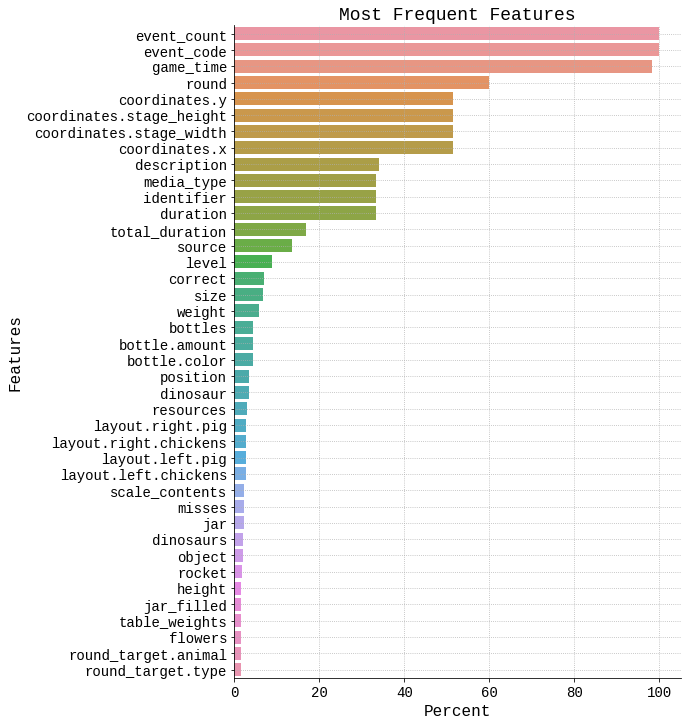

In [72]:
f, ax = plt.subplots(figsize=(8, 12))
ax = sns.barplot(x='Percent', y='index', data=stat_info.head(40))
ax.set_title('Most Frequent Features')
ax.set_ylabel('Features')
ax.grid(True, linestyle='dotted')

In [77]:
stat_info['index'][:13].tolist()

['event_count',
 'event_code',
 'game_time',
 'round',
 'coordinates.y',
 'coordinates.stage_height',
 'coordinates.stage_width',
 'coordinates.x',
 'description',
 'media_type',
 'identifier',
 'duration',
 'total_duration']

In [40]:
def extract_specs(row):
    expanded = pd.DataFrame([
        {'event_id': row['event_id'],
         'info': row['info'],
         'args_name': arg['name'],
         'args_type': arg['type'],
         'args_info': arg['info']}
        for arg in json.loads(row['args'])])
    return expanded

In [41]:
from itertools import chain
from joblib import Parallel, delayed
from tqdm.notebook import tqdm

In [42]:
def create_records(row):
    return [{'event_id': row['event_id'],
            'info': row['info'],
            'args_name': args['name'],
            'args_type': args['type'],
            'args_info': args['info']}
           for args in json.loads(row['args'])]

def parallel(rows, num_workers=12):
    with Parallel(num_workers) as p:
        results = p(delayed(create_records)(row) for row in tqdm(rows))
    return list(chain(*results))

In [43]:
specs_args = pd.DataFrame(parallel(trn_specs.to_dict('records')))

In [44]:
specs_args.shape

(2541, 5)

In [45]:
cnt = specs_args.groupby('event_id')['info'].count().rename('count').reset_index()

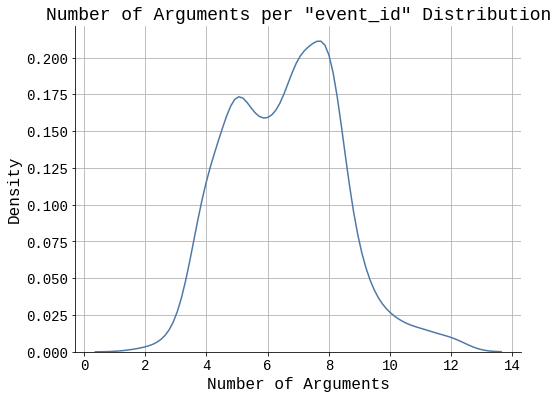

In [46]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.distplot(cnt['count'], kde=True, hist=False, bins=40, ax=ax)
ax.set_title('Number of Arguments per "event_id" Distribution')
ax.set_xlabel('Number of Arguments')
ax.set_ylabel('Density')
ax.grid(True);

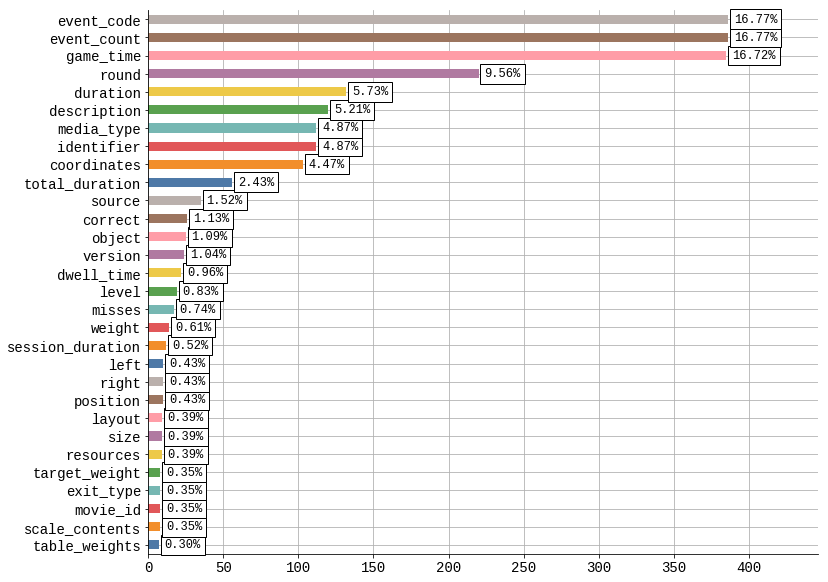

In [47]:
plot_bars_with_percentage(count(specs_args, 'args_name', most_freq=30), 
                          xcol='args_name', ycol='count', figsize=(12, 10));

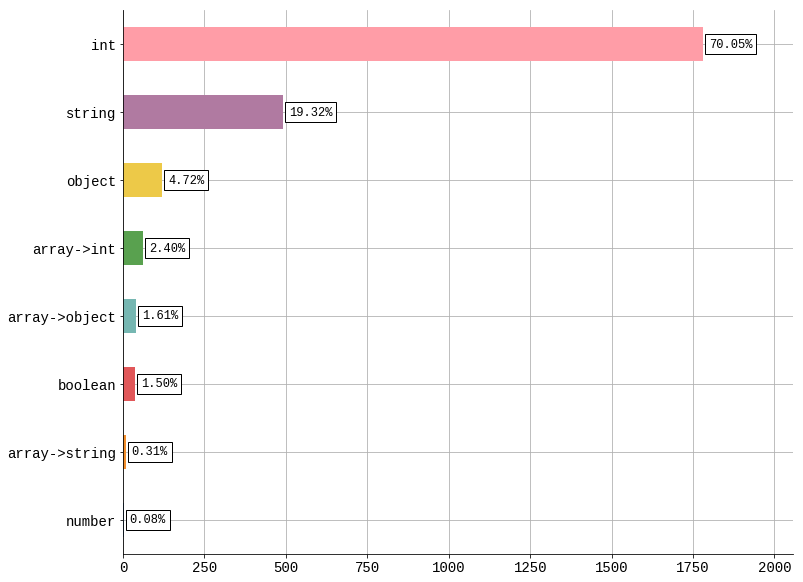

In [48]:
plot_bars_with_percentage(count(specs_args, 'args_type', most_freq=30), 
                          xcol='args_type', ycol='count', figsize=(12, 10));

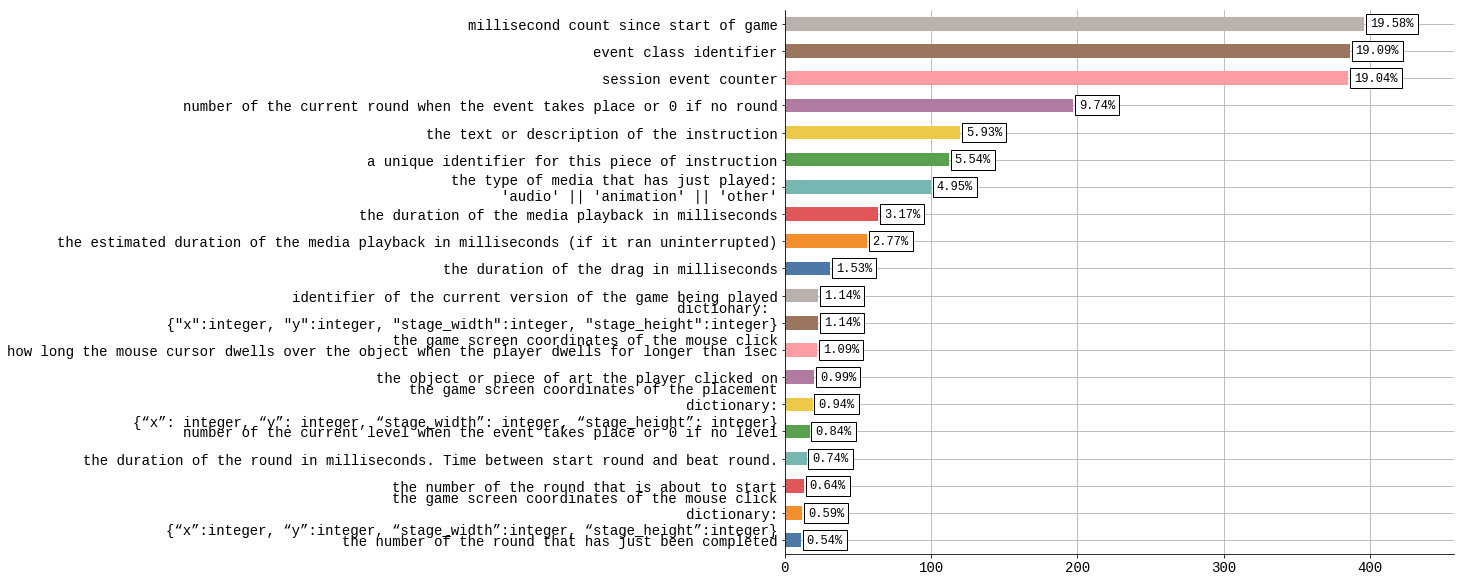

In [49]:
plot_bars_with_percentage(count(specs_args, 'args_info', most_freq=20), 
                          xcol='args_info', ycol='count', figsize=(12, 10));

In [50]:
def extract_time(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    ts = df['timestamp']
    df['month'] = ts.dt.month
    df['hour'] = ts.dt.hour
    df['dayofweek'] = ts.dt.dayofweek
    df['weekofyear'] = ts.dt.weekofyear
    df['quarter'] = ts.dt.quarter
    df['is_month_start'] = ts.dt.is_month_start
    return df

In [51]:
trn_data = extract_time(trn_data)
tst_data = extract_time(tst_data)

In [52]:
from IPython.display import display

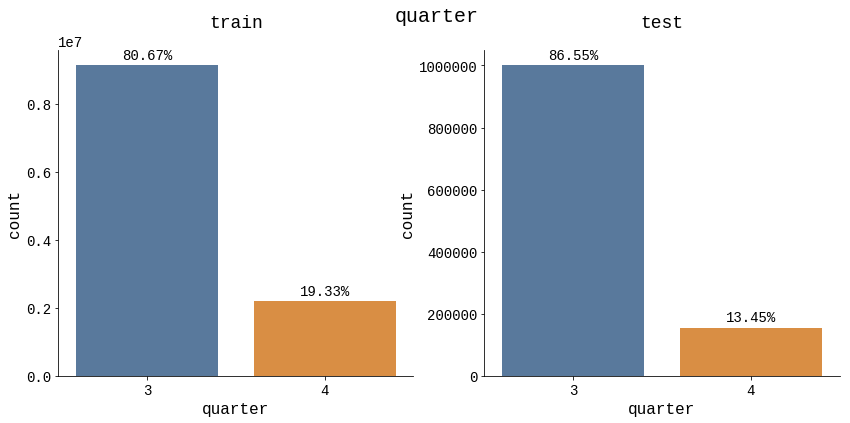

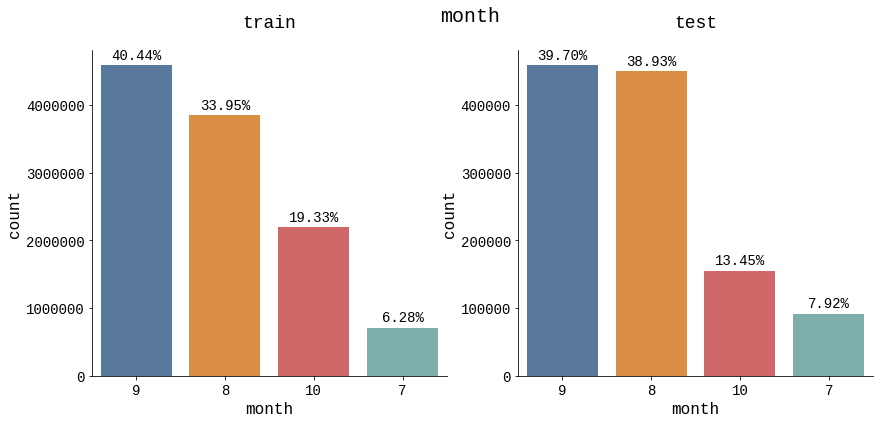

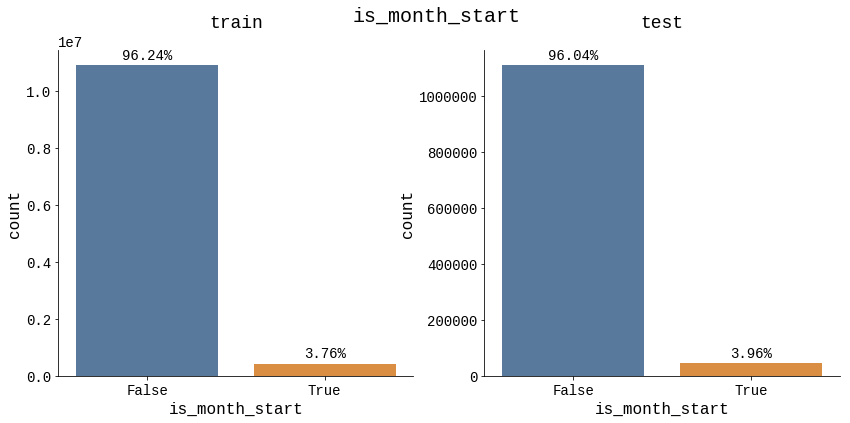

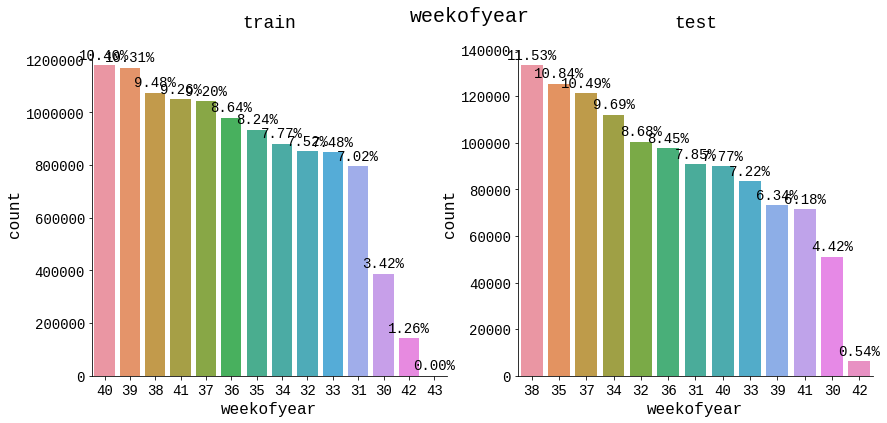

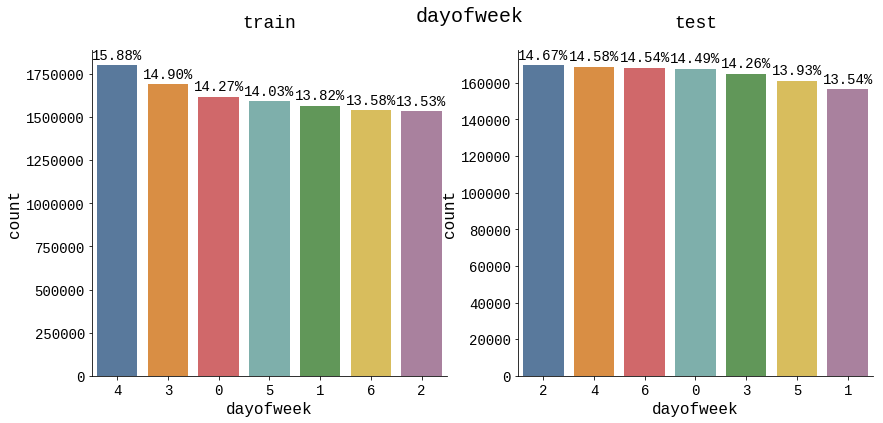

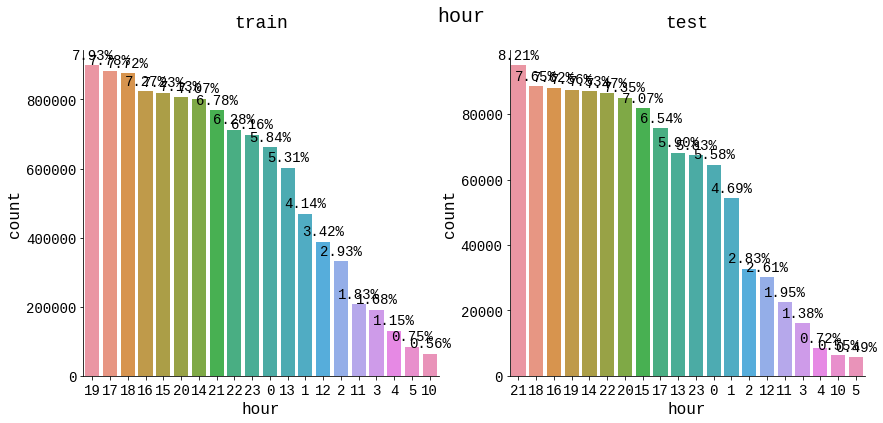

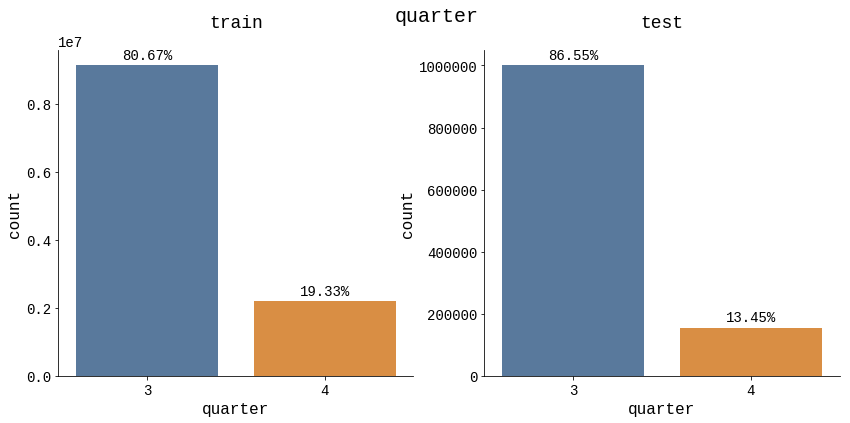

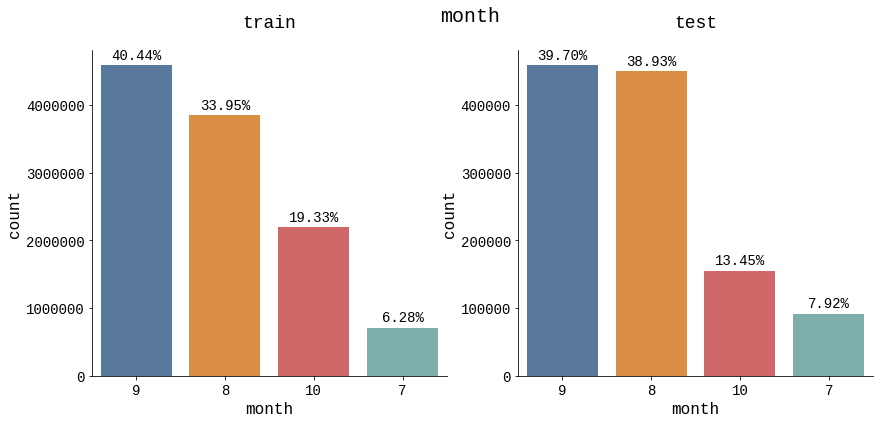

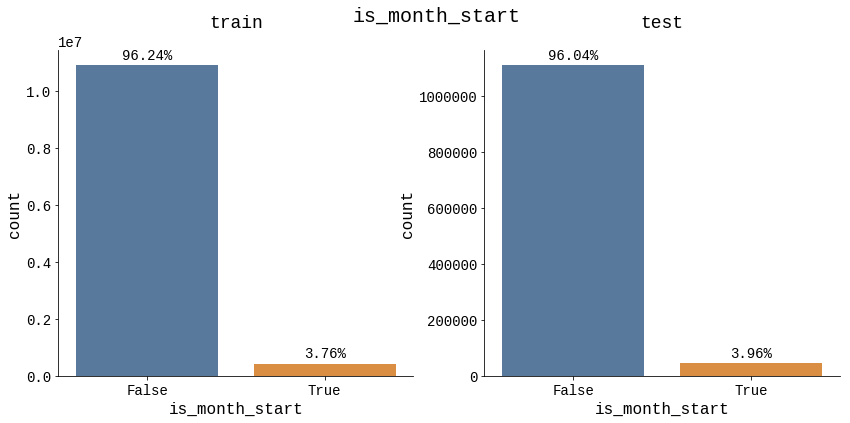

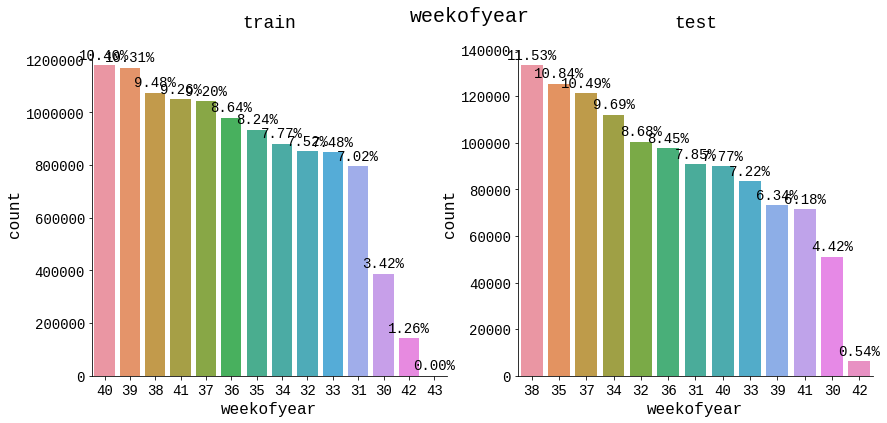

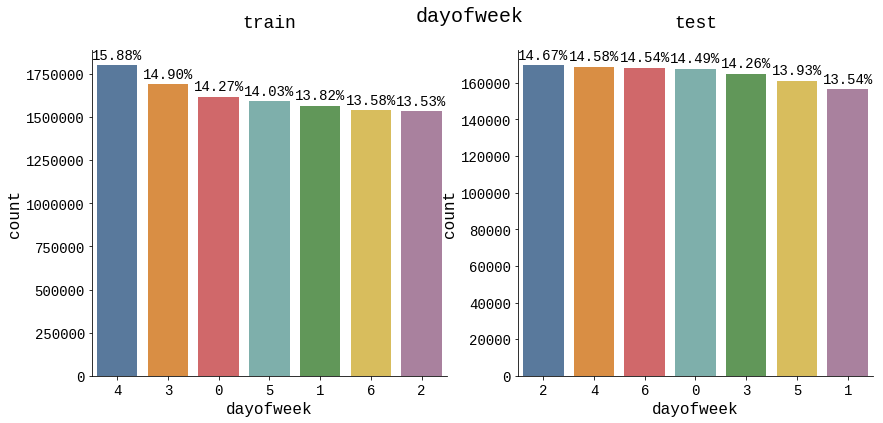

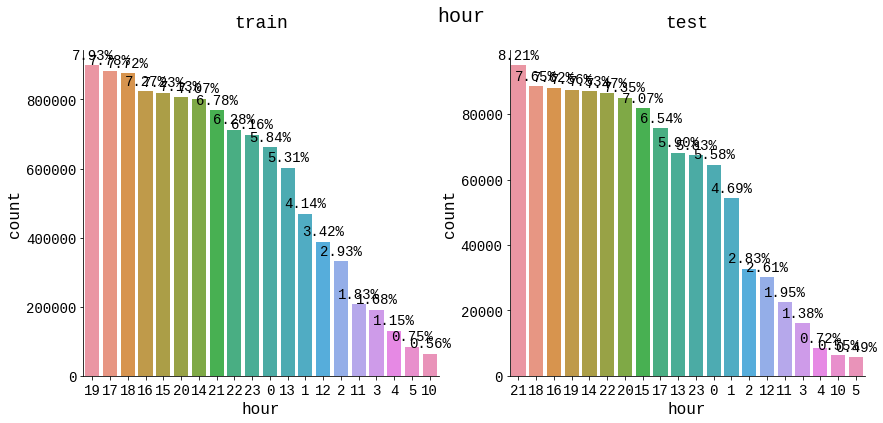

In [53]:
for key in ('quarter', 'month', 'is_month_start', 'weekofyear', 'dayofweek', 'hour'):
    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    ax1, ax2 = axes.flat
    for dataset, ax, title in zip((trn_data, tst_data), (ax1, ax2), ('train', 'test')):
        plot_counts(dataset, key, ax=ax)
        ax.set_title(title)
    f.suptitle(key)
    display(f)

In [54]:
num_cols = ['game_time', 'month', 'dayofweek', 'hour']
cat_cols = ['type', 'world']
inst_stats = pd.DataFrame({'installation_id': trn_data['installation_id'].unique()})
inst_stats.set_index('installation_id', inplace=True)

In [55]:
def compute_stats(df, column):
    stats = ['mean', 'sum', 'min', 'max', 'std', 'skew']
    df = df.groupby('installation_id')
    df = df.agg({column: stats})
    df[column] = df[column].fillna(df[column].mean())
    df.columns = [f'{column}_{stat}' for stat in stats]
    return df

In [56]:
for col in num_cols:
    stats = compute_stats(trn_data, col)
    inst_stats = inst_stats.merge(stats, left_index=True, right_index=True)

In [57]:
inst_stats.head()

,game_time_mean,game_time_sum,game_time_min,game_time_max,game_time_std,game_time_skew,month_mean,month_sum,month_min,month_max,...,dayofweek_min,dayofweek_max,dayofweek_std,dayofweek_skew,hour_mean,hour_sum,hour_min,hour_max,hour_std,hour_skew
installation_id,,,,,,,,,,,,,,,,,,,,,
0001e90f,201787.799558,273826044.0,0.0,570396.0,164377.067566,0.664036,9.000000,12213.0,9.0,9.0,...,4.0,4.0,0.000000,0.000000,17.733235,24064.0,17.0,18.0,0.442432,-1.055889
000447c4,81011.751381,14663127.0,0.0,175347.0,47014.118535,0.101741,10.000000,1810.0,10.0,10.0,...,4.0,4.0,0.000000,0.000000,14.690608,2659.0,14.0,15.0,0.463525,-0.831616
0006a69f,82491.007366,313548319.0,0.0,1520600.0,159789.192183,7.504204,8.000000,30408.0,8.0,8.0,...,1.0,4.0,1.118187,1.140557,11.927124,45335.0,4.0,20.0,6.595070,-0.051903
0006c192,90398.352968,201045937.0,0.0,395901.0,77779.338412,1.366377,9.238309,20546.0,9.0,10.0,...,1.0,5.0,1.656208,-1.090668,9.882644,21979.0,0.0,15.0,6.944234,-0.674168
0009a5a9,398593.543689,164220540.0,0.0,1684228.0,648848.534146,1.312675,9.000000,3708.0,9.0,9.0,...,2.0,2.0,0.000000,0.000000,18.225728,7509.0,18.0,19.0,0.418569,1.316914


In [58]:
labels_acc = dict(
    trn_target
    .groupby('title')['accuracy_group']
    .agg(lambda x: x.value_counts().index[0]))
labels = trn_target[['installation_id', 'title', 'accuracy_group']].copy()
labels['title'] = labels['title'].map(labels_acc)
inst_stats = labels.merge(inst_stats, on='installation_id', how='left')
inst_stats.shape

(17690, 27)

In [59]:
inst_stats.head()

,installation_id,title,accuracy_group,game_time_mean,game_time_sum,game_time_min,game_time_max,game_time_std,game_time_skew,month_mean,...,dayofweek_min,dayofweek_max,dayofweek_std,dayofweek_skew,hour_mean,hour_sum,hour_min,hour_max,hour_std,hour_skew
0,0006a69f,3,3,82491.007366,313548319.0,0.0,1520600.0,159789.192183,7.504204,8.0,...,1.0,4.0,1.118187,1.140557,11.927124,45335.0,4.0,20.0,6.59507,-0.051903
1,0006a69f,0,0,82491.007366,313548319.0,0.0,1520600.0,159789.192183,7.504204,8.0,...,1.0,4.0,1.118187,1.140557,11.927124,45335.0,4.0,20.0,6.59507,-0.051903
2,0006a69f,3,3,82491.007366,313548319.0,0.0,1520600.0,159789.192183,7.504204,8.0,...,1.0,4.0,1.118187,1.140557,11.927124,45335.0,4.0,20.0,6.59507,-0.051903
3,0006a69f,3,2,82491.007366,313548319.0,0.0,1520600.0,159789.192183,7.504204,8.0,...,1.0,4.0,1.118187,1.140557,11.927124,45335.0,4.0,20.0,6.59507,-0.051903
4,0006a69f,0,3,82491.007366,313548319.0,0.0,1520600.0,159789.192183,7.504204,8.0,...,1.0,4.0,1.118187,1.140557,11.927124,45335.0,4.0,20.0,6.59507,-0.051903


In [60]:
n_unique(inst_stats)

installation_id: 3614
title: 2
accuracy_group: 4
game_time_mean: 3614
game_time_sum: 3614
game_time_min: 1
game_time_max: 3608
game_time_std: 3614
game_time_skew: 3614
month_mean: 1716
month_sum: 3213
month_min: 4
month_max: 4
month_std: 1718
month_skew: 1715
dayofweek_mean: 2564
dayofweek_sum: 2975
dayofweek_min: 7
dayofweek_max: 7
dayofweek_std: 2561
dayofweek_skew: 2559
hour_mean: 3051
hour_sum: 3446
hour_min: 24
hour_max: 24
hour_std: 3033
hour_skew: 3030


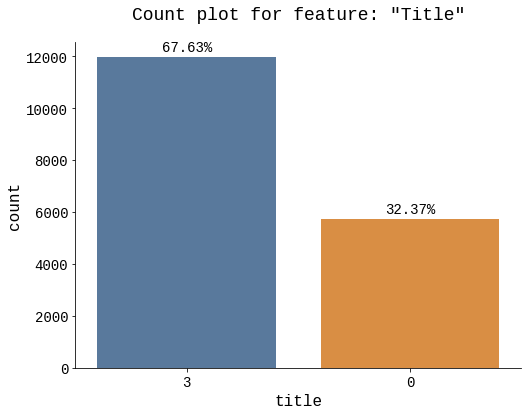

In [61]:
plot_counts(inst_stats, 'title')

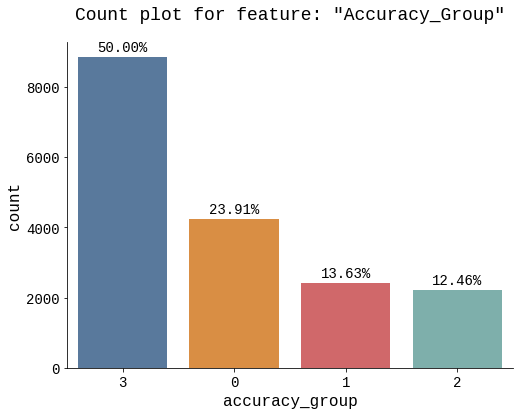

In [62]:
plot_counts(inst_stats, 'accuracy_group')

In [63]:
def plot_distribution(dataset, filter_col, stat_col, ax=None, **fig_kwargs):
    f, ax = create_axes_if_needed(ax, **fig_kwargs)
    for value in  dataset[filter_col].unique():
        df = dataset.query(f'{filter_col} == {value}')
        sns.distplot(np.log(df[stat_col]), kde=True, 
                     hist_kws={'edgecolor': 'white'},
                     label=f'title: {value}', ax=ax)
    ax.grid(True)
    ax.legend()
    return ax

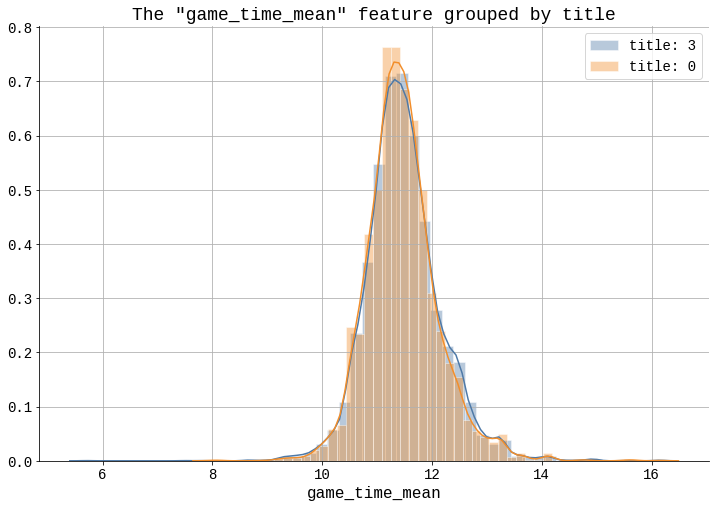

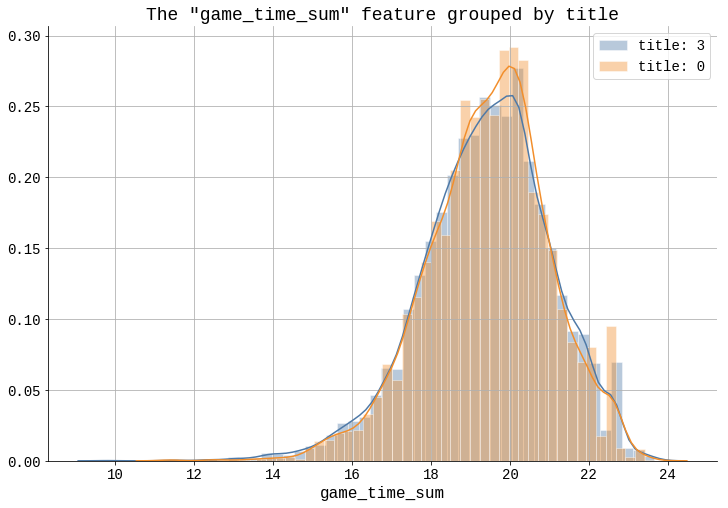

/home/ck/anaconda3/envs/fastai_10/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ck/anaconda3/envs/fastai_10/lib/python3.7/site-packages/seaborn/utils.py:368: RuntimeWarning: invalid value encountered in double_scalars
  return q3 - q1
/home/ck/anaconda3/envs/fastai_10/lib/python3.7/site-packages/seaborn/distributions.py:39: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))


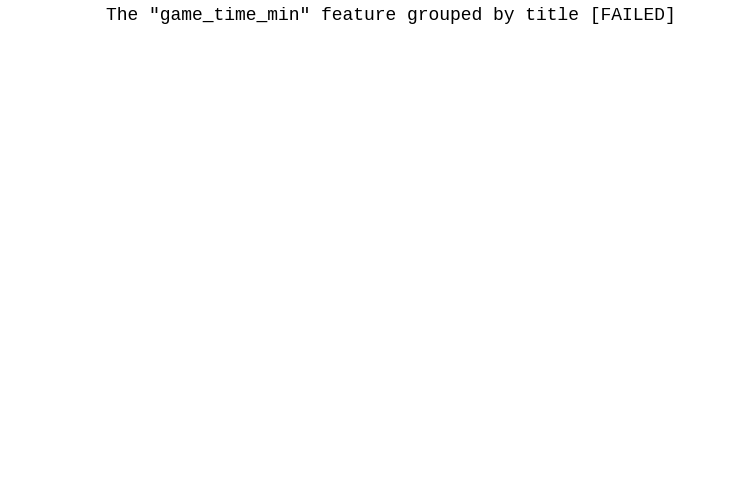

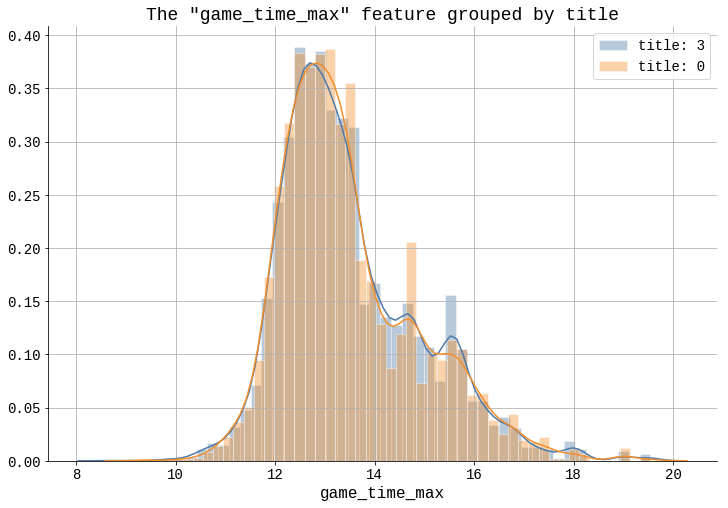

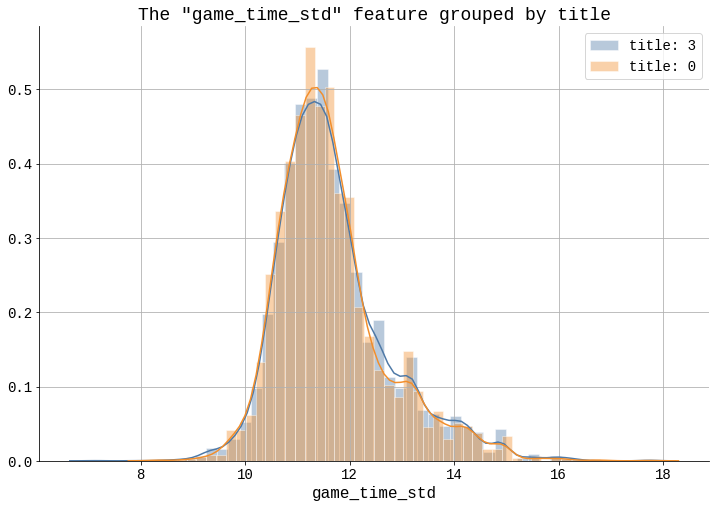

/home/ck/anaconda3/envs/fastai_10/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


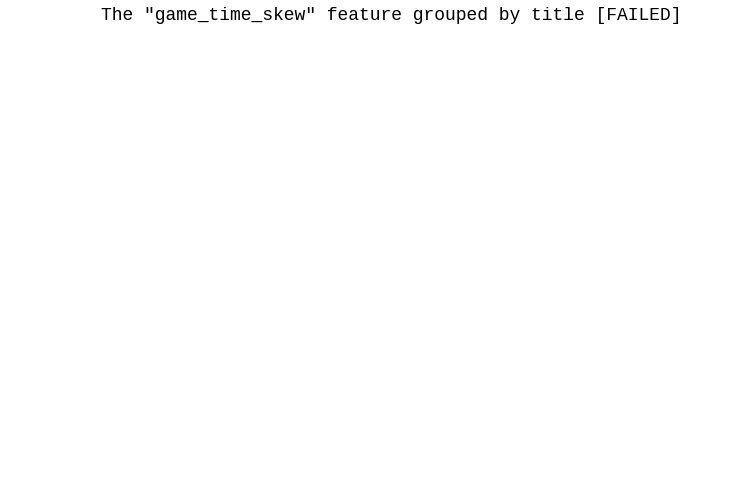

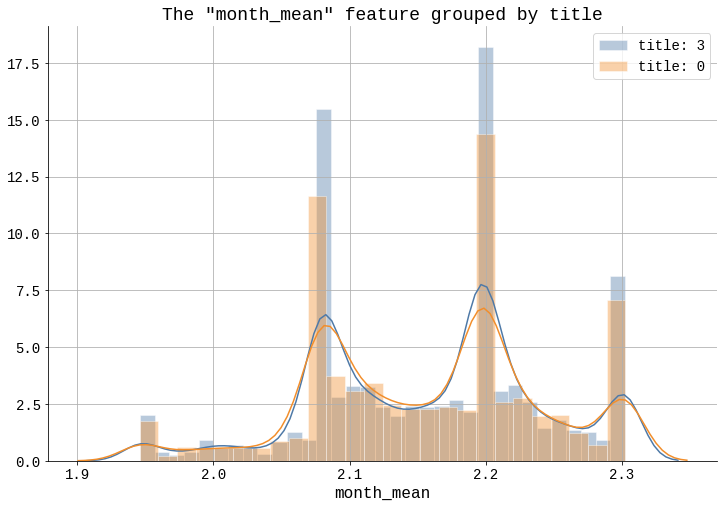

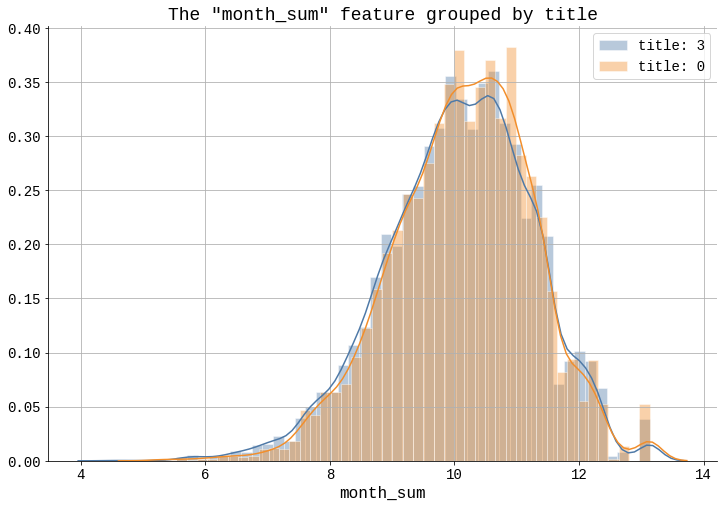

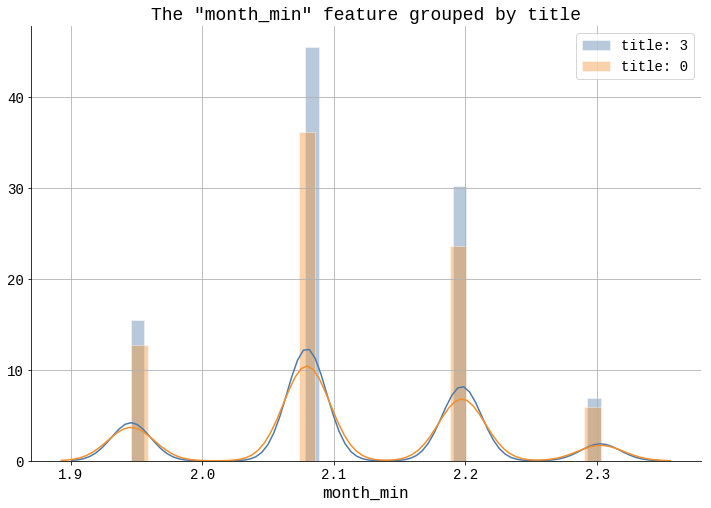

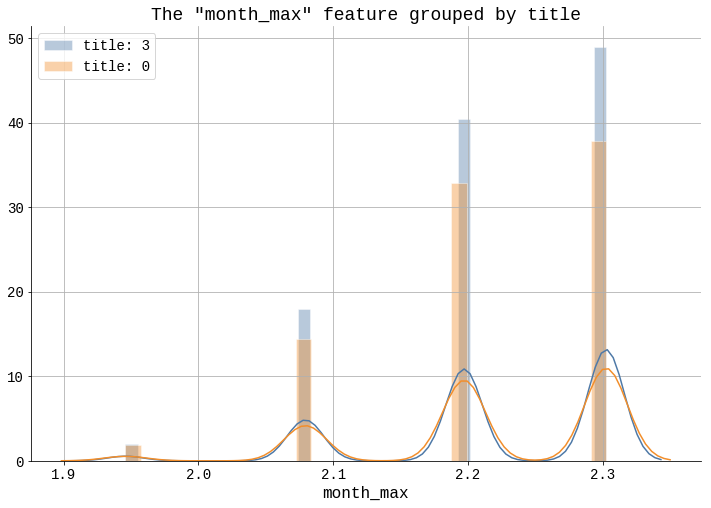

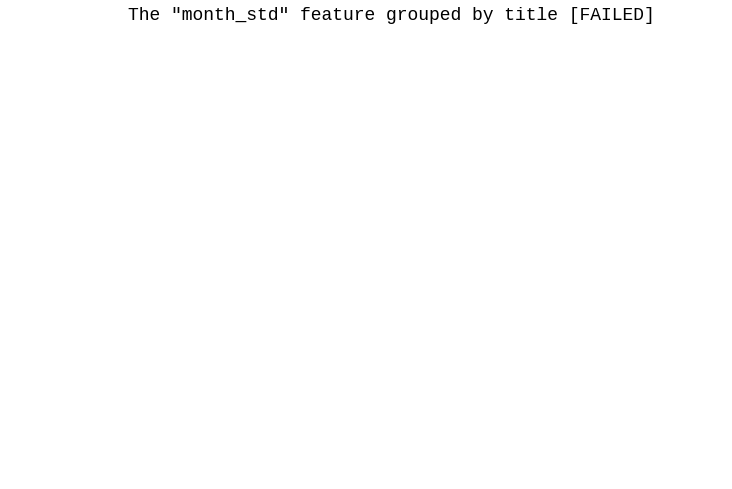

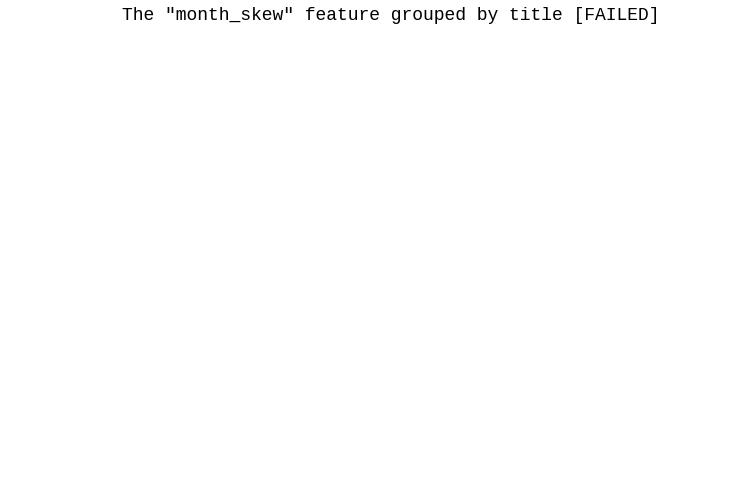

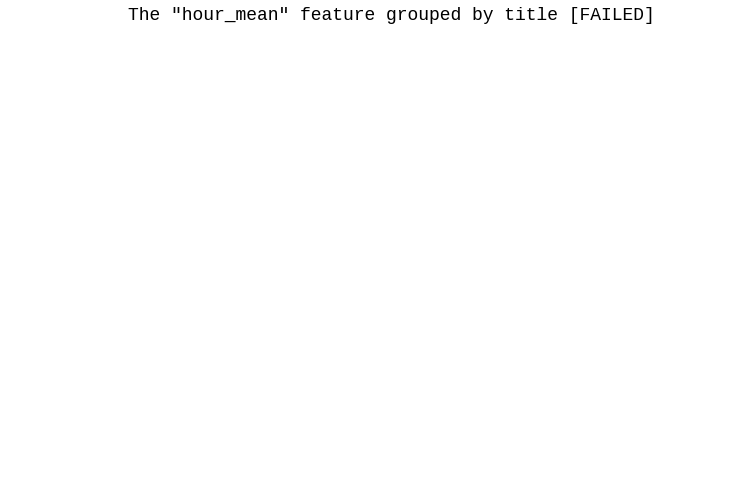

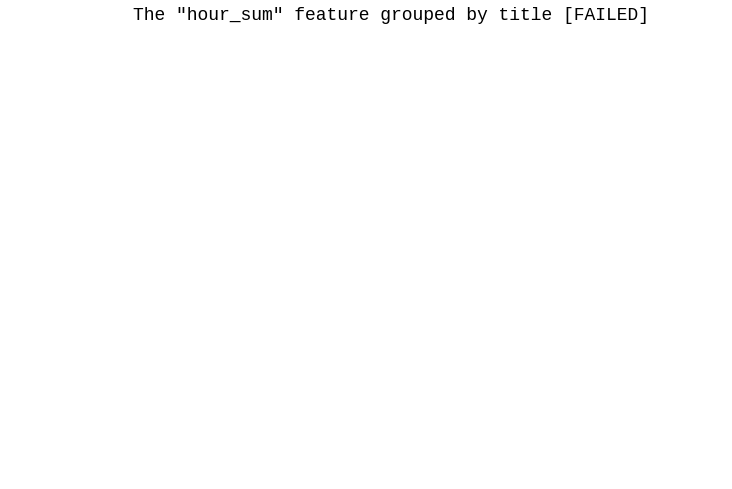

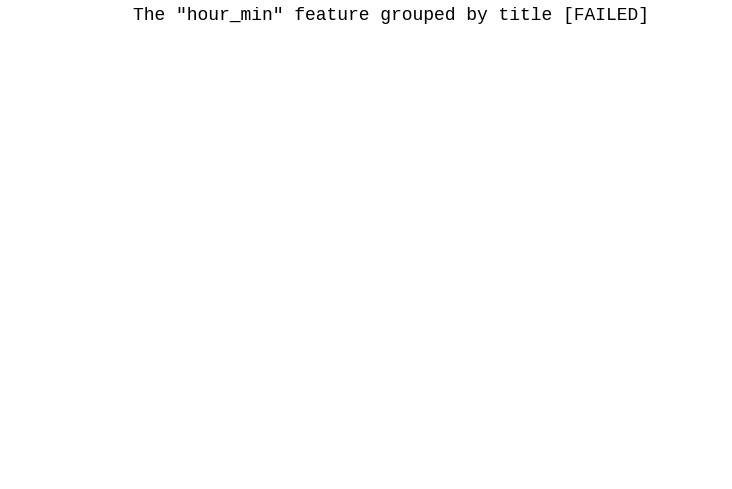

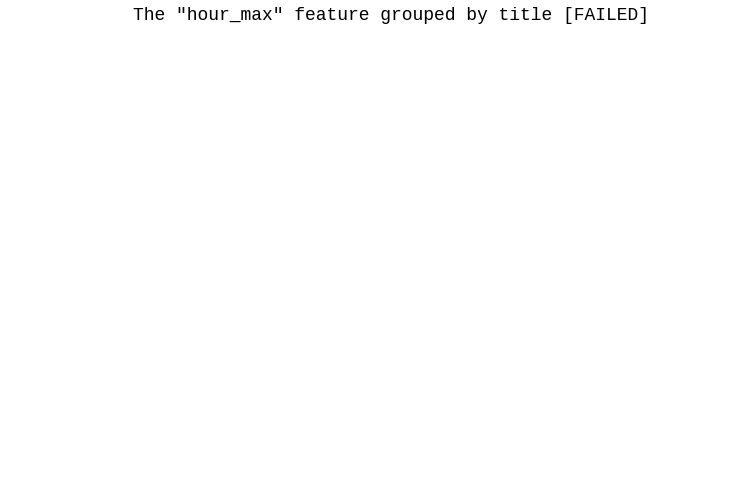

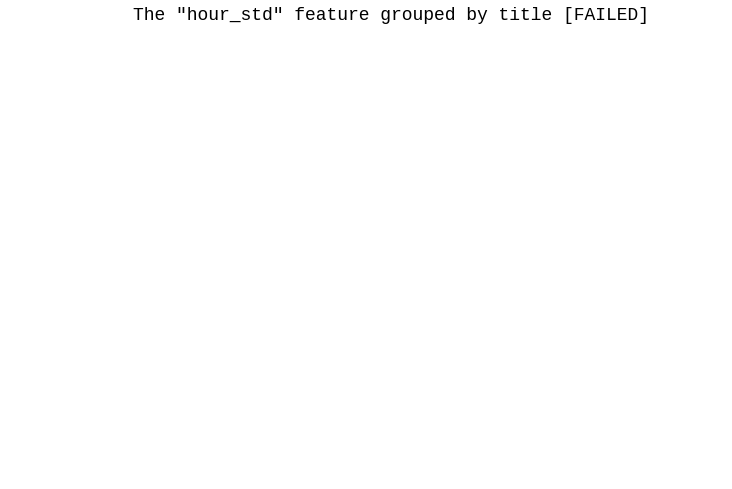

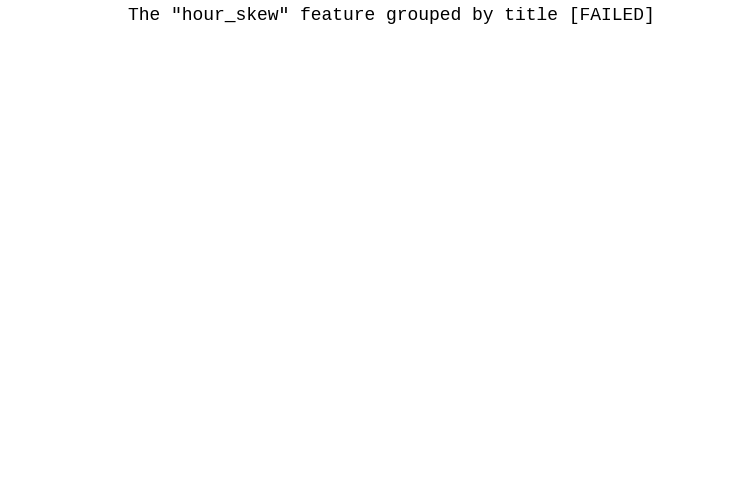

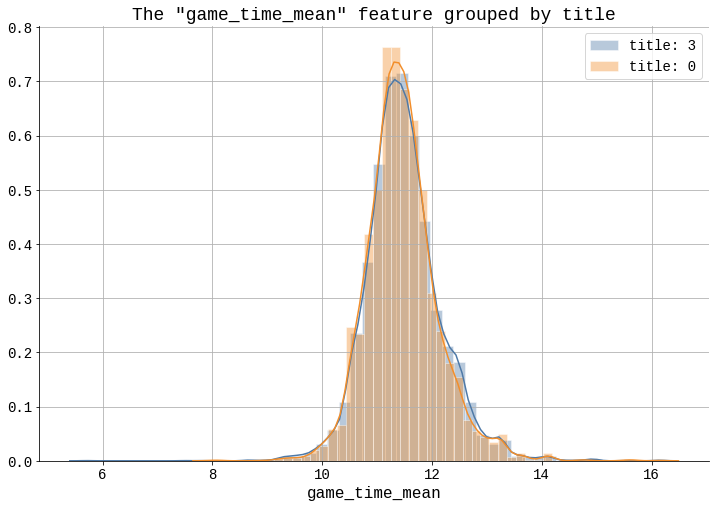

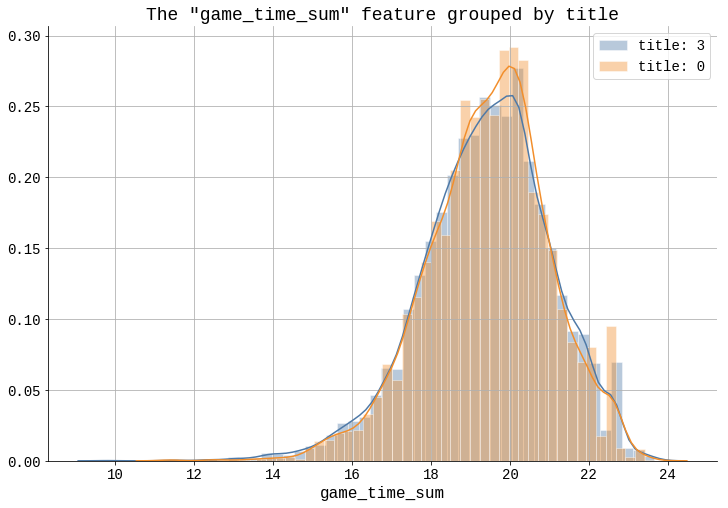

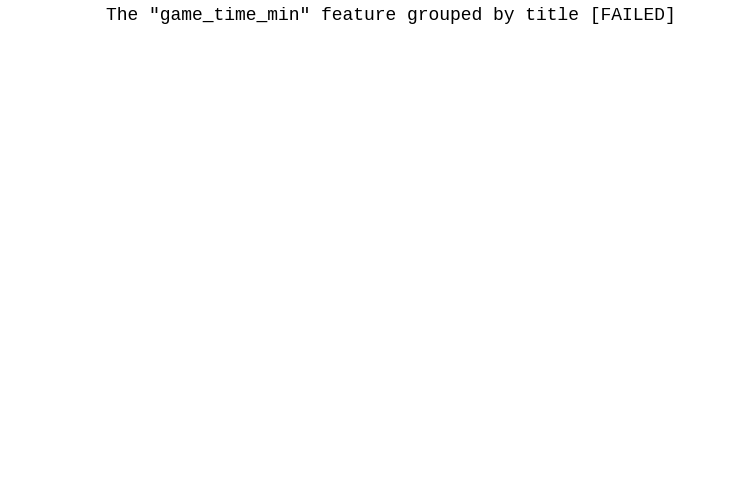

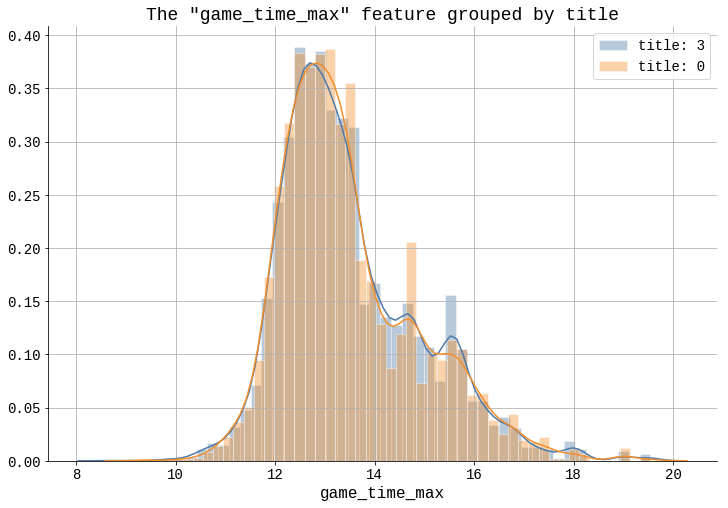

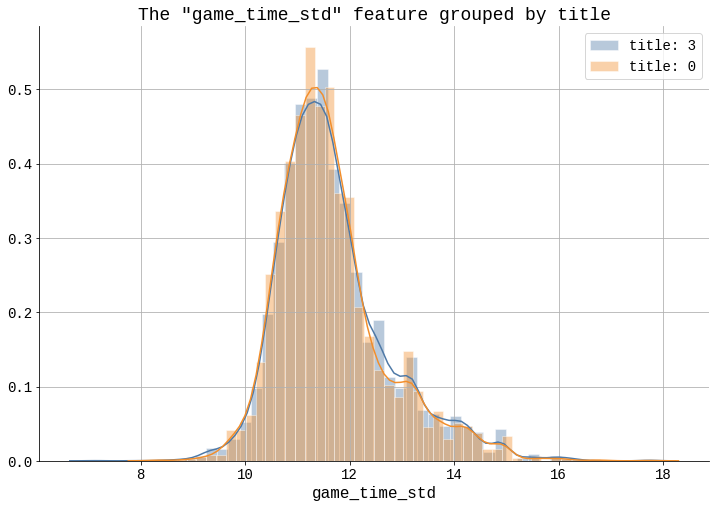

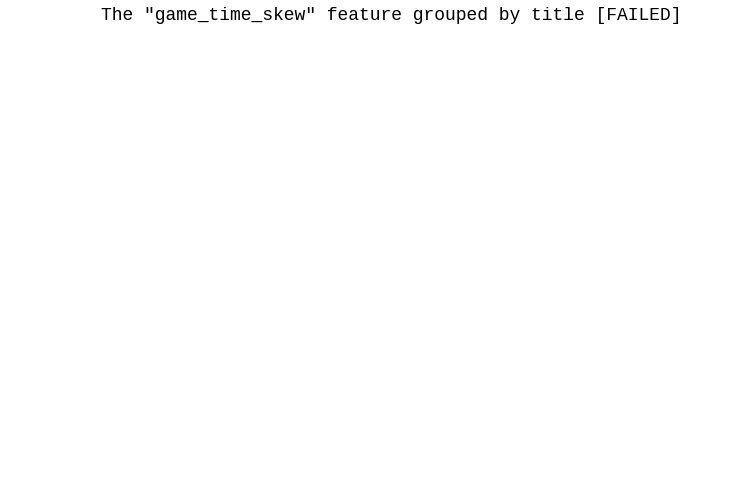

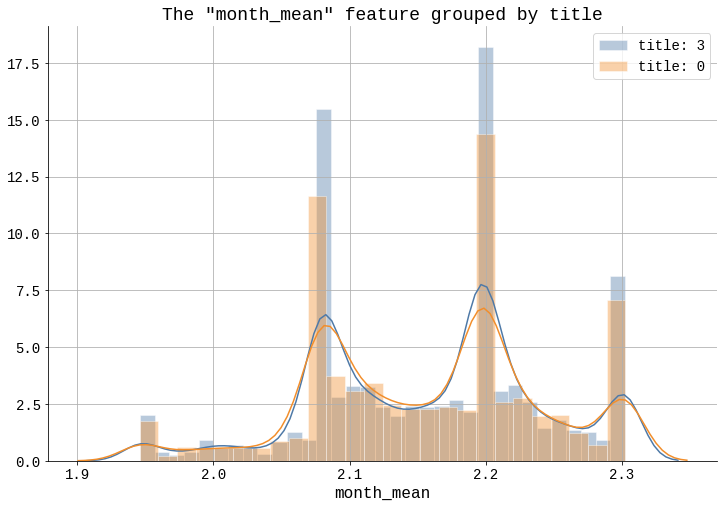

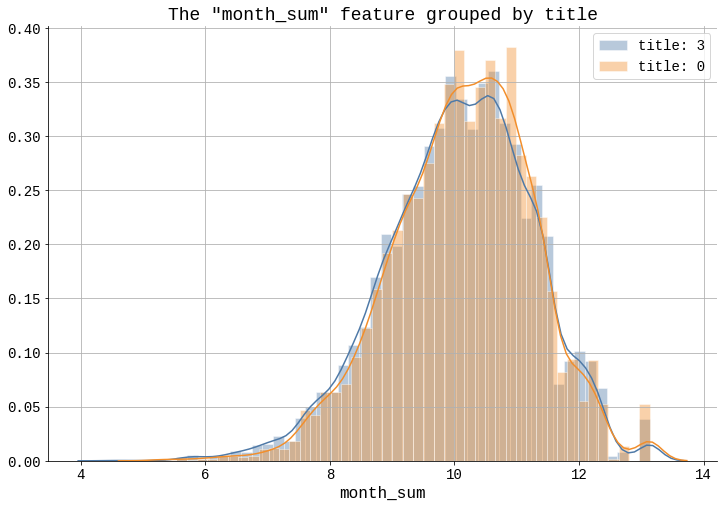

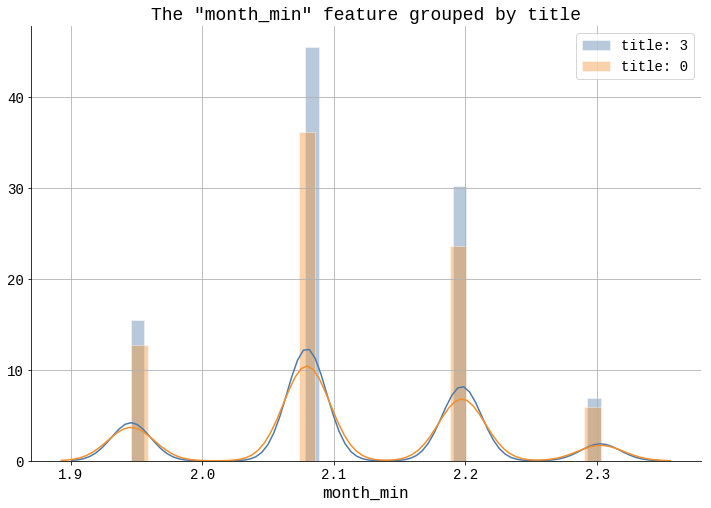

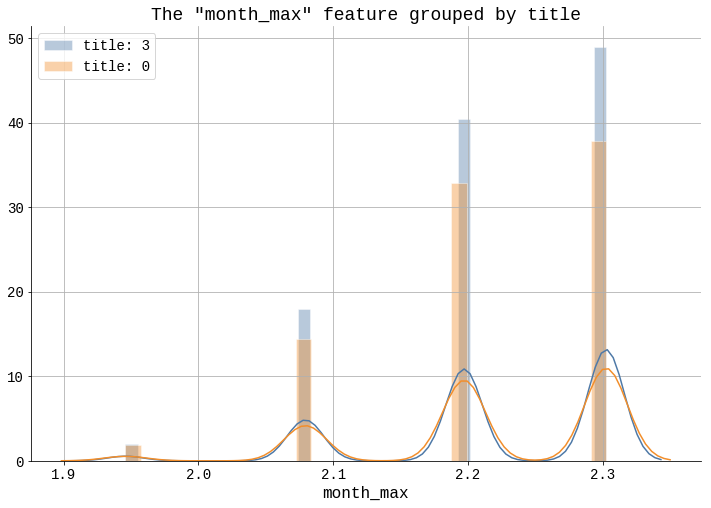

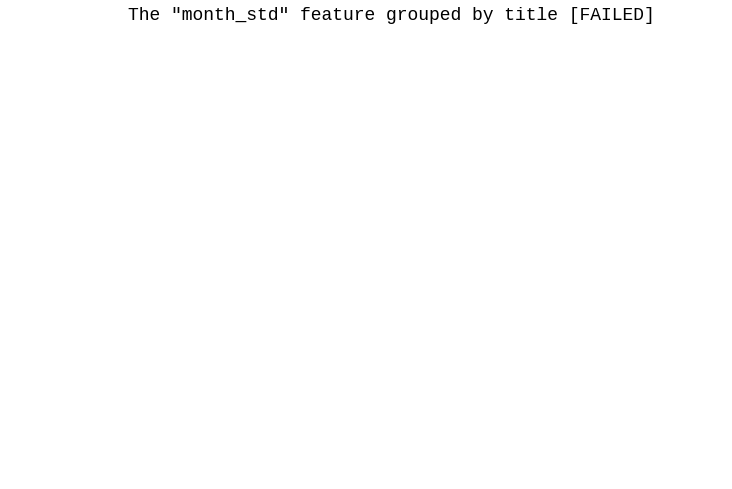

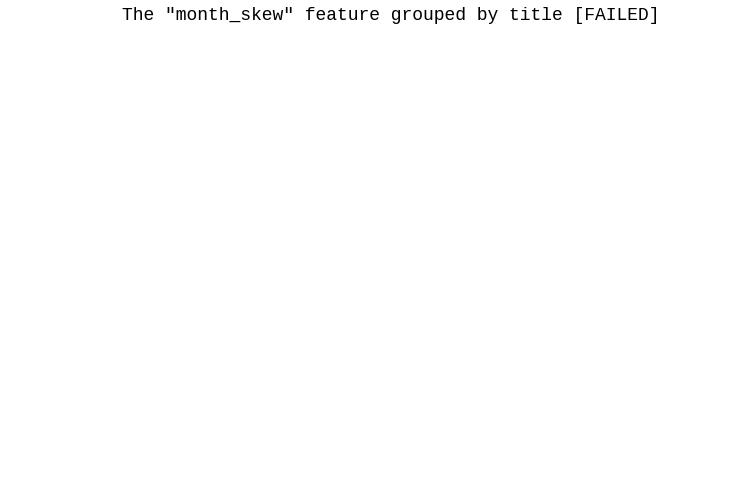

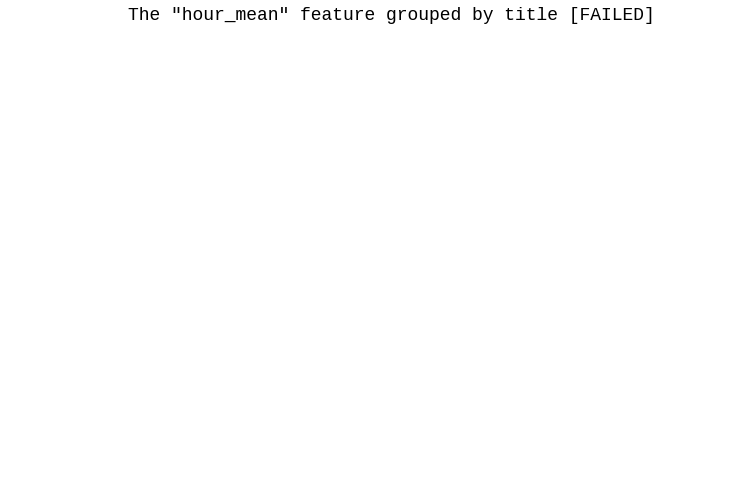

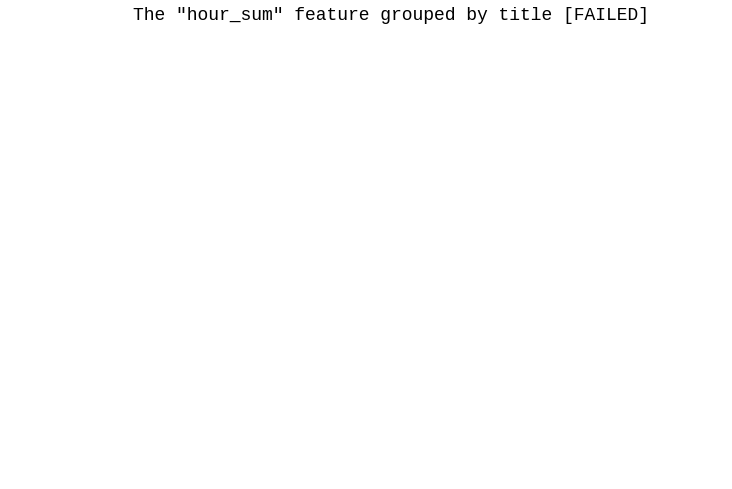

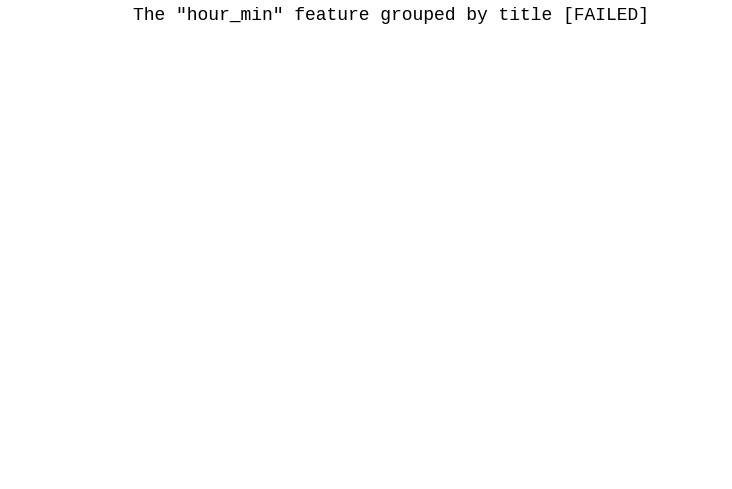

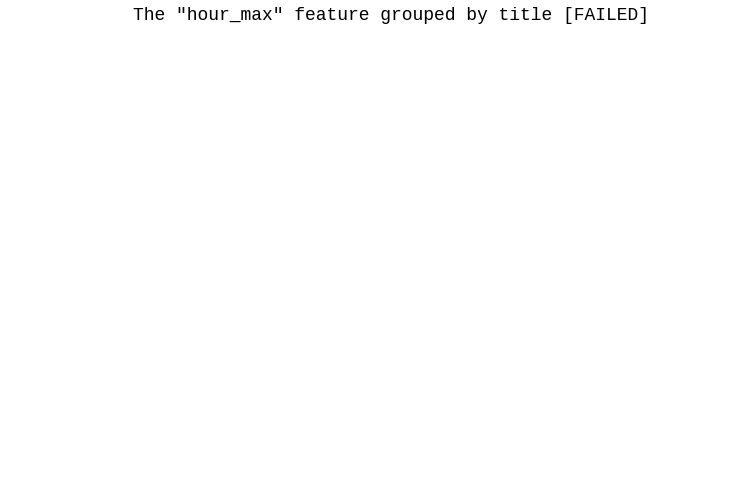

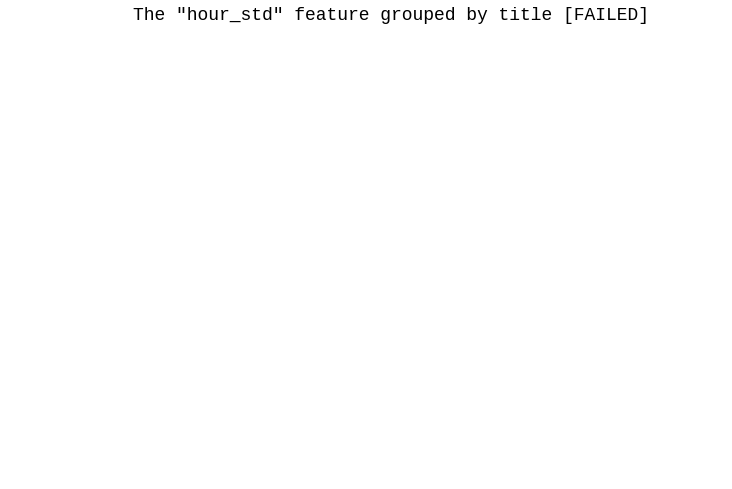

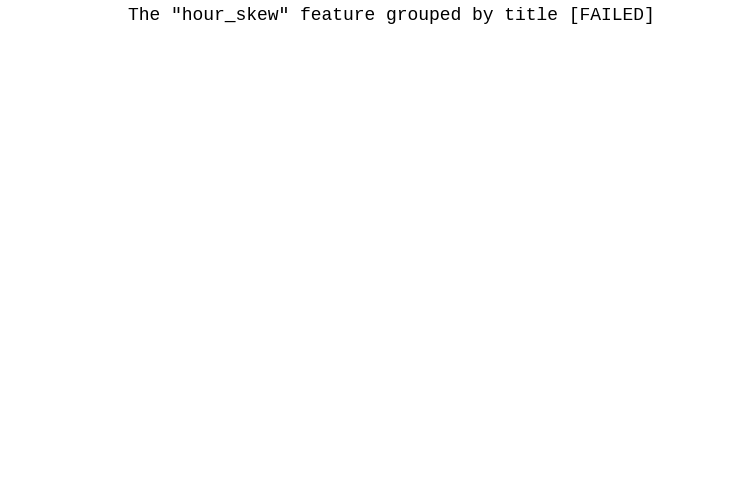

In [64]:
cols = inst_stats.columns[inst_stats.columns.str.match('^(game_time|month|hour)_')]
for col in cols:
    f, ax = plt.subplots(1, 1, figsize=(12, 8))
    title = f'The "{col}" feature grouped by title'
    try:
        plot_distribution(inst_stats, 'title', col, ax=ax)
    except:
        ax.axis('off')
        title = f"{title} [FAILED]"
    ax.set_title(title)
    display(f)